<a href="https://colab.research.google.com/github/AlvaroCarrizales/Proyecto_inteligencia_artificial/blob/master/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving 9.jpg to 9 (1).jpg


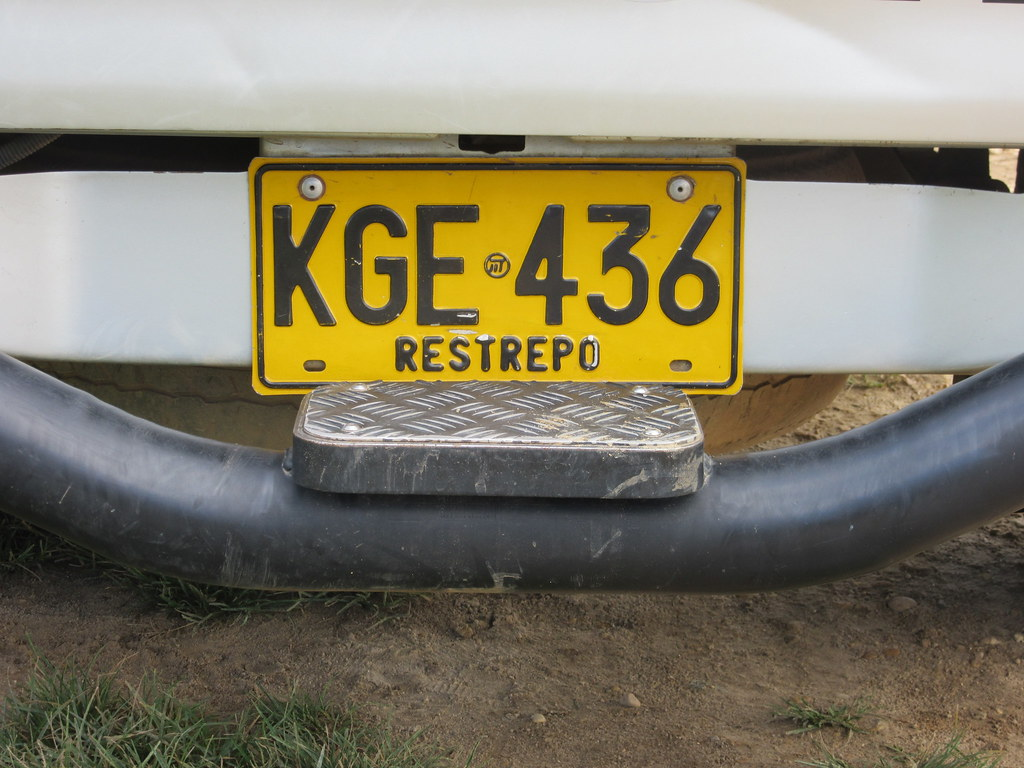

In [0]:
Image('9.jpg')

In [0]:
import cv2
import numpy as np
import math as m
from matplotlib import pyplot as plt

In [0]:
directorio="9.jpg"
a=cv2.imread(directorio)
rgB=np.matrix(a[:,:,0])
rGb=np.matrix(a[:,:,1])
Rgb=np.matrix(a[:,:,2])
I=cv2.absdiff(rGb,rgB)
II=I

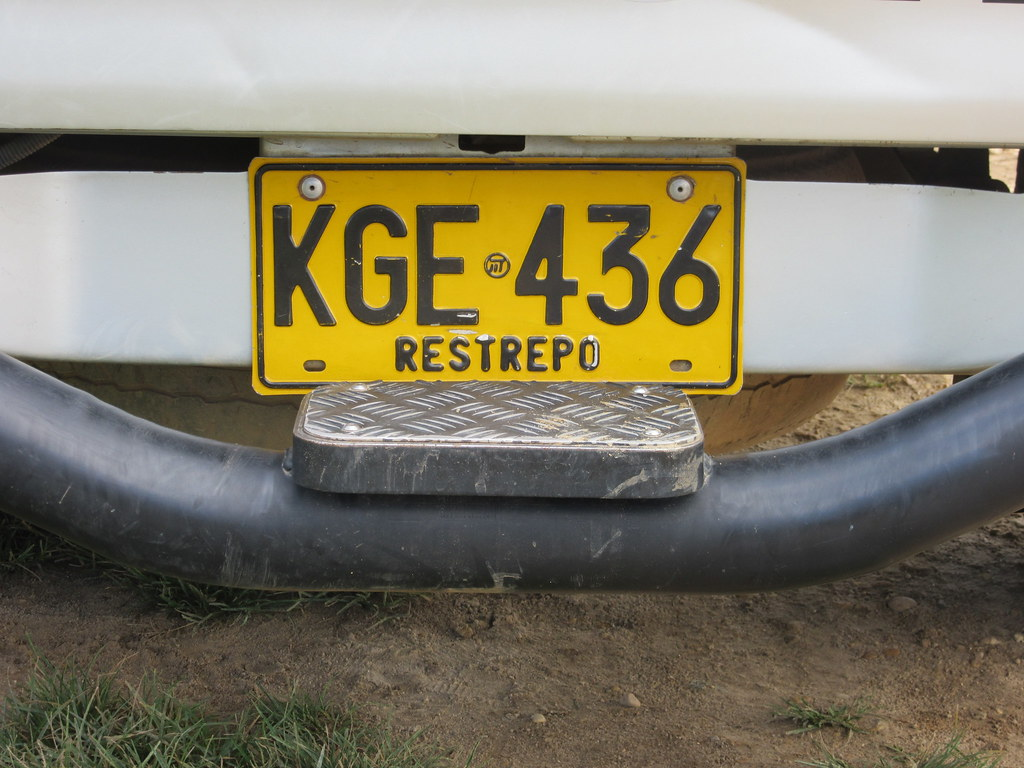

In [0]:
Image(directorio)

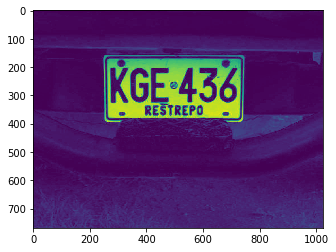

In [0]:
plt.imshow(II)
plt.show()

In [0]:
[fil,col]=I.shape 
for o in range(0,fil):
  for oo in range(0,col):
    if I[o,oo]<80:
      I[o,oo]=0
for o in range(0,fil):
  for oo in range(0,col):
    if I[o,oo]>0:
      I[o,oo]=1

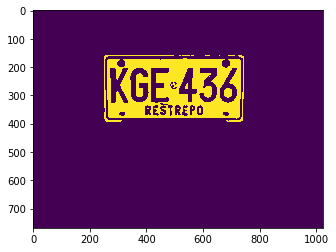

In [0]:
plt.imshow(I)
plt.show()

In [0]:
se=np.ones((50,50),np.uint8)
se2=np.ones((10,10),np.uint8)
closing=cv2.morphologyEx(I,cv2.MORPH_CLOSE,se)
dilation=cv2.dilate(closing,se2,1)

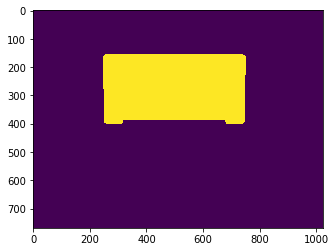

In [0]:
plt.imshow(dilation)
plt.show()

In [0]:
S,contours,hierarchy=cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt=contours[:]
num=len(cnt)
box=np.zeros((num,4))
for j in range(0,num):
  box[j,:]=cv2.boundingRect(cnt[j])
L=np.zeros((num,4))
Max=[0,0]
for j in range(0,num):
  L[j,:]=box[j]
  if L[j,2]>Max[1]:
    Max=[j,L[j,2]]
BOX=box[Max[0],:]
b=a[int(BOX[1]):int(BOX[1])+int(BOX[3]),int(BOX[0]):int(BOX[0])+int(BOX[2]),:]
directorio2="blank.jpg"
cv2.imwrite(directorio2,b)

True

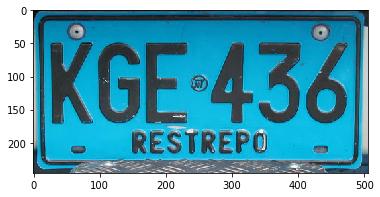

In [0]:
plt.imshow(b)
plt.show()

In [0]:
directorio3="blank.jpg"
A=cv2.imread(directorio3)
[fil,col,cap]=A.shape
rgB=A[:,:,0]
rGb=A[:,:,1]
Rgb=A[:,:,2]
R=Rgb/255.0
G=rGb/255.0
B=rgB/255.0
K=np.zeros((fil,col))
for o in range(0,fil):
  for oo in range(0,col):
    MAX=max(R[o,oo],G[o,oo],B[o,oo])
    K[o,oo]=1-MAX
cv2.imwrite("prueba.bmp",K)
k=cv2.imread("prueba.bmp")

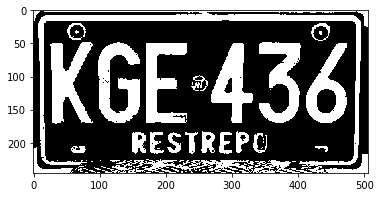

In [0]:
plt.imshow(k*255)
plt.show()

In [0]:
BW1=cv2.Laplacian(k,cv2.CV_8UC1)
Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,1]

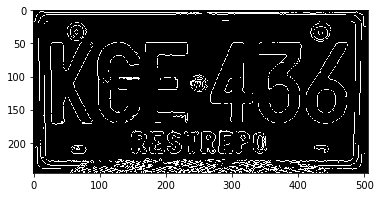

In [0]:
plt.imshow(BW1*255)
plt.show()

In [0]:
ret,thresh=cv2.threshold(Image,0,255,0)
S,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt=contours[:]
num=len(cnt)
box=np.zeros((num,4))
for j in range(0,num):
  box[j,:]=cv2.boundingRect(cnt[j])
Box=np.zeros((20,4))
[L,A]=thresh.shape
q=0
for j in range(0,num):
  p=box[j,:]
  if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
    Box[q]=p
    q=q+1
BOX=np.zeros((6,4))
num=len(Box)
q=0
for j in range(0,num):
  if j%2==0 and j<11:
    BOX[q]=Box[j]
    q=q+1

In [0]:
LETRA1=BW1[int(BOX[0,1]):int(BOX[0,1])+int(BOX[0,3]),int(BOX[0,0]):int(BOX[0,0])+int(BOX[0,2])]
LETRA2=BW1[int(BOX[1,1]):int(BOX[1,1])+int(BOX[1,3]),int(BOX[1,0]):int(BOX[1,0])+int(BOX[1,2])]
LETRA3=BW1[int(BOX[2,1]):int(BOX[2,1])+int(BOX[2,3]),int(BOX[2,0]):int(BOX[2,0])+int(BOX[2,2])]
NUM1=BW1[int(BOX[3,1]):int(BOX[3,1])+int(BOX[3,3]),int(BOX[3,0]):int(BOX[3,0])+int(BOX[3,2])]
NUM2=BW1[int(BOX[4,1]):int(BOX[4,1])+int(BOX[4,3]),int(BOX[4,0]):int(BOX[4,0])+int(BOX[4,2])]
NUM3=BW1[int(BOX[5,1]):int(BOX[5,1])+int(BOX[5,3]),int(BOX[5,0]):int(BOX[5,0])+int(BOX[5,2])]

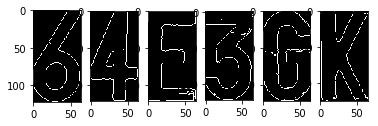

In [0]:
plt.subplot(161),plt.imshow(LETRA1*255)
plt.subplot(162),plt.imshow(LETRA2*255)
plt.subplot(163),plt.imshow(LETRA3*255)
plt.subplot(164),plt.imshow(NUM1*255)
plt.subplot(165),plt.imshow(NUM2*255)
plt.subplot(166),plt.imshow(NUM3*255)
plt.show()